In [1]:
import numpy as np
from fashion_mnist_dataset.utils import mnist_reader
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load datasets
X_train_mnist, y_train_mnist = mnist_reader.load_mnist('fashion_mnist_dataset/data/fashion', kind='train')
X_test_mnist, y_test_mnist = mnist_reader.load_mnist('fashion_mnist_dataset/data/fashion', kind='t10k')

X_train_tshirt_boot = np.array([image for image, label in zip(X_train_mnist, y_train_mnist) if label == 0 or label == 9])
y_train_tshirt_boot = np.array([0 if label == 0 else 1 for image, label in zip(X_train_mnist, y_train_mnist) if label == 0 or label == 9])
X_test_tshirt_boot = np.array([image for image, label in zip(X_test_mnist, y_test_mnist) if label == 0 or label == 9])
y_test_tshirt_boot = np.array([0 if label == 0 else 1 for image, label in zip(X_test_mnist, y_test_mnist) if label == 0 or label == 9])

In [2]:
# Shuffle
shuffled_indices = np.random.permutation(len(X_train_tshirt_boot))
X_train_tshirt_boot = X_train_tshirt_boot[shuffled_indices]
y_train_tshirt_boot = X_train_tshirt_boot[shuffled_indices].reshape(-1, 1)

shuffled_indices = np.random.permutation(len(X_test_tshirt_boot))
X_test_tshirt_boot = X_test_tshirt_boot[shuffled_indices]
y_test_tshirt_boot = y_test_tshirt_boot[shuffled_indices].reshape(-1, 1)

In [3]:
# Normalization
def normalize(vec): 
    maximum = max(vec)
    minimum = min(vec)
    interval = maximum - minimum
    if interval == 0: 
        return vec
    else:
        return (vec - minimum) / interval

X_train_tshirt_boot = np.apply_along_axis(normalize, 0, X_train_tshirt_boot)
X_test_tshirt_boot = np.apply_along_axis(normalize, 0, X_test_tshirt_boot)

In [4]:
# Principal component analysis (PCA)
def pca(A):
    mean = np.mean(A, axis = 0)
    centered = A - mean
    covariance_matrix = np.cov(centered.T)
    eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)
    
    return np.fliplr(eigen_vectors)

pc_tshirt_boot = pca(X_train_tshirt_boot)

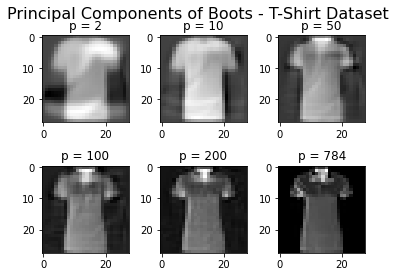

In [6]:
# Visualize PCs
sample_image = X_train_tshirt_boot[np.random.choice(len(X_train_tshirt_boot)), :]

pc_tshirt_boot_2 = (sample_image @ pc_tshirt_boot[:, :2] @ pc_tshirt_boot[:, :2].T)
pc_tshirt_boot_10 = (sample_image @ pc_tshirt_boot[:, :10] @ pc_tshirt_boot[:, :10].T)
pc_tshirt_boot_50 = (sample_image @ pc_tshirt_boot[:, :50] @ pc_tshirt_boot[:, :50].T)
pc_tshirt_boot_100 = (sample_image @ pc_tshirt_boot[:, :100] @ pc_tshirt_boot[:, :100].T)
pc_tshirt_boot_200 = (sample_image @ pc_tshirt_boot[:, :200] @ pc_tshirt_boot[:, :200].T)
pc_tshirt_boot_784 = (sample_image @ pc_tshirt_boot[:, :784] @ pc_tshirt_boot[:, :784].T)

fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('Principal Components of Boots - T-Shirt Dataset', fontsize = 16)
axs[0, 0].set_title('p = 2')
axs[0, 0].imshow(pc_tshirt_boot_2.reshape((28, 28)), cmap='gray')
axs[0, 1].set_title('p = 10')
axs[0, 1].imshow(pc_tshirt_boot_10.reshape((28, 28)), cmap='gray')
axs[0, 2].set_title('p = 50')
axs[0, 2].imshow(pc_tshirt_boot_50.reshape((28, 28)), cmap='gray')
axs[1, 0].set_title('p = 100')
axs[1, 0].imshow(pc_tshirt_boot_100.reshape((28, 28)), cmap='gray')
axs[1, 1].set_title('p = 200')
axs[1, 1].imshow(pc_tshirt_boot_200.reshape((28, 28)), cmap='gray')
axs[1, 2].set_title('p = 784')
axs[1, 2].imshow(pc_tshirt_boot_784.reshape((28, 28)), cmap='gray')